Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar



[1] "The correlation coefficient is -0.9906"

[1] "The R^2 value is 0.9812,"


Call:
lm(formula = Q1y ~ Q1x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5818 -0.3454  0.1061  0.5439  0.8546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.51515    0.87992   39.23 1.96e-10 ***
Q1x         -0.90606    0.04433  -20.44 3.43e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8053 on 8 degrees of freedom
Multiple R-squared:  0.9812,	Adjusted R-squared:  0.9789 
F-statistic: 417.8 on 1 and 8 DF,  p-value: 3.434e-08


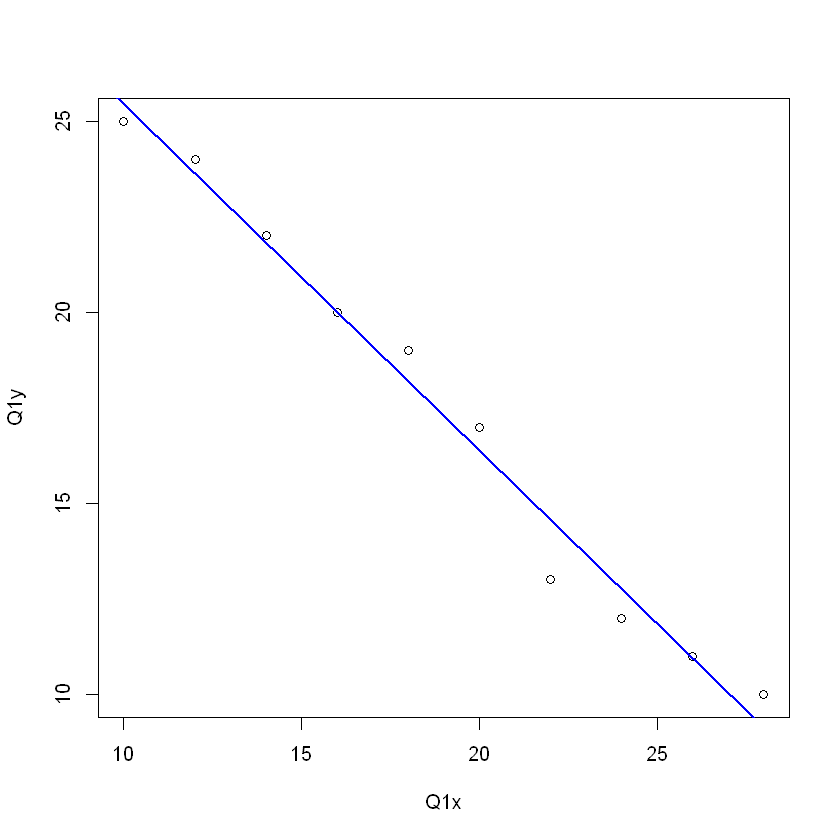

In [1]:
# Question 4.1

library("readxl")

Lab4data <- read_excel("MATPMD1LabSession4Data.xlsx", range="G1:H11")
# use the column names as variable names in this environment
attach(Lab4data)

#a)
plot(Q1x,Q1y)

#b)
# Note that method="pearson" to get the correlation coefficient r.
# Also, note that the use="complete.obs" option tells r to only look
# at complete cases, and ignore any missing values
r<-cor(Q1x, Q1y,method="pearson",use="complete.obs")
sprintf("The correlation coefficient is %.4g",r)

#c)
sprintf("The R^2 value is %.4g,",r^2)

#d)
lm4<-lm(Q1y~Q1x)
summary(lm4)
# So we can see that the equation of our regression line is
# y = 34.51515 -0.90606x

#e)
abline(lm4,lwd=2,col="blue")

#f) Slope is significantly different to 0. But we expected that given that
# r=-0.9906

# drop the variable names we set up from the column names 
detach(Lab4data)




Call:
lm(formula = Q2Life ~ Q2Process)

Residuals:
   Min     1Q Median     3Q    Max 
-472.2 -165.2  114.2  204.4  285.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  833.803    235.284   3.544  0.00232 ** 
Q2Process     65.736      6.204  10.597 3.64e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 265.5 on 18 degrees of freedom
Multiple R-squared:  0.8618,	Adjusted R-squared:  0.8542 
F-statistic: 112.3 on 1 and 18 DF,  p-value: 3.635e-09


Q2Process
<dbl>
33


,fit,lwr,upr
1,3003.078,2429.4,3576.756


,fit,lwr,upr
1,4777.94,4130.64,5425.24


,fit,lwr,upr
1,3003.078,2429.4,3576.756


Q2Process
<int>
20
21
22
23
24
25
26
27
28


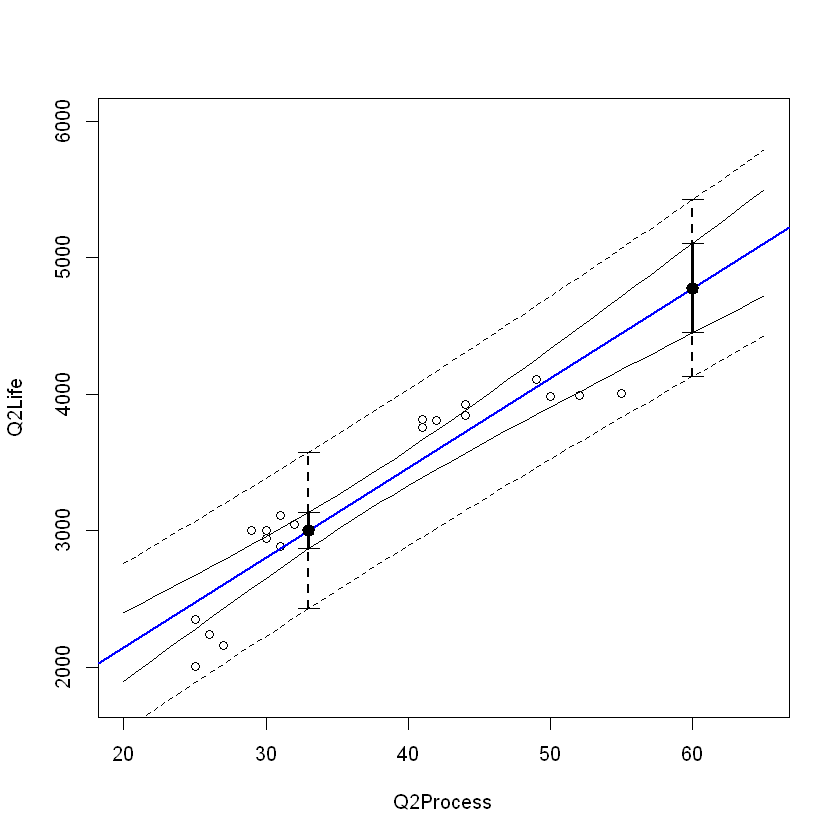

In [4]:
# Question 4.2

library("readxl")

Lab4data <- read_excel("MATPMD1LabSession4Data.xlsx", range="K1:L21")
attach(Lab4data)

# The columns of data for Q5 can now be accessed by variable names
# Q5Process and Q5Life

#a)
plot(Q2Process,Q2Life,xlim=c(20,65),ylim=c(1800,6000))

# find the regression line
lm5<-lm(Q2Life~Q2Process)
# and plot the regression line on our original plot
abline(lm5,lwd=2,col="blue")

#b)
summary(lm5)
# Our R^2 value is 0.8618 and the p-value for our F-test is < 0.00001 
# so our regression is significant. Note, how, the points at either end
# of the plot are not quite so well fitted. 

#c) find predicted and confidence interval values for 33 
newdata<-data.frame(Q2Process=c(33))

preds33<-predict(lm5,new=newdata,interval="prediction")
preds33
confs33<-predict(lm5,new=newdata,interval="confidence")

# plot the predicted value lwd=4 makes it a bit point
points(33,preds33[1,"fit"],lwd=4)
# the confidence interval, lwd=2 makes a wider bar
segments(33,confs33[1,"lwr"],33,confs33[1,"upr"],lwd=3)
# and the prediction interval as well with a dashed line
segments(33,preds33[1,"lwr"],33,preds33[1,"upr"],col="black",lwd=2,lty=2)
# and put a little whisker at the end of both the confidence and the 
# prediction intervals.
# There is probably a much cleaner way of doing this
lines(c(33-0.75,33+0.75),c(preds33[1,"lwr"],preds33[1,"lwr"]))
lines(c(33-0.75,33+0.75),c(preds33[1,"upr"],preds33[1,"upr"]))
lines(c(33-0.75,33+0.75),c(confs33[1,"lwr"],confs33[1,"lwr"]))
lines(c(33-0.75,33+0.75),c(confs33[1,"upr"],confs33[1,"upr"]))

#d) find predicted and confidence interval values for 33 
newdata<-data.frame(Q2Process=c(60))

preds60<-predict(lm5,new=newdata,interval="prediction")
confs60<-predict(lm5,new=newdata,interval="confidence")

# plot the predicted value lwd=4 makes it a bit point
points(60,preds60[1,"fit"],lwd=4)
# the confidence interval, lwd=4 makes a wider bar
segments(60,confs60[1,"lwr"],60,confs60[1,"upr"],lwd=3)
# and the prediction interval as well with a solid line
segments(60,preds60[1,"lwr"],60,preds60[1,"upr"],col="black",lwd=2,lty=2)
# and put a little whisker at the end of both the confidence and the 
# prediction intervals.
# There is probably a much cleaner way of doing this
lines(c(60-0.75,60+0.75),c(preds60[1,"lwr"],preds60[1,"lwr"]))
lines(c(60-0.75,60+0.75),c(preds60[1,"upr"],preds60[1,"upr"]))
lines(c(60-0.75,60+0.75),c(confs60[1,"lwr"],confs60[1,"lwr"]))
lines(c(60-0.75,60+0.75),c(confs60[1,"upr"],confs60[1,"upr"]))


# You could also plot confidence and prediction band for the whole interval
newdata<-data.frame(Q2Process=seq(20,65))

preds<-predict(lm5,new=newdata,interval="prediction")
confs<-predict(lm5,new=newdata,interval="confidence")

# and plot the predicted interval lower range with dashed line (lty=2)
lines(newdata$Q2Process,preds[,"lwr"],lty=2)
# predicted interval upper range
lines(newdata$Q2Process,preds[,"upr"],lty=2)

# and plot the confidence interval lower range
lines(newdata$Q2Process,confs[,"lwr"])
# predicted upper range
lines(newdata$Q2Process,confs[,"upr"])

# and remove attacment we made in this environment of variable names to
# column names
detach(Lab4data)

preds33
newdata